# Задача 1
**1. Разведочный анализ данных**

Убедитесь в отсутствии пропусков и сбалансированности классов.

*Введите долю элементов класса 1.*

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/electricity_train.csv')
round(len(data[data['class'] == 1]) / len(data), 3)

0.425

Постройте матрицу корреляций.

*Перечислите через запятую и пробел пару наиболее коррелированных переменных.*

<Axes: >

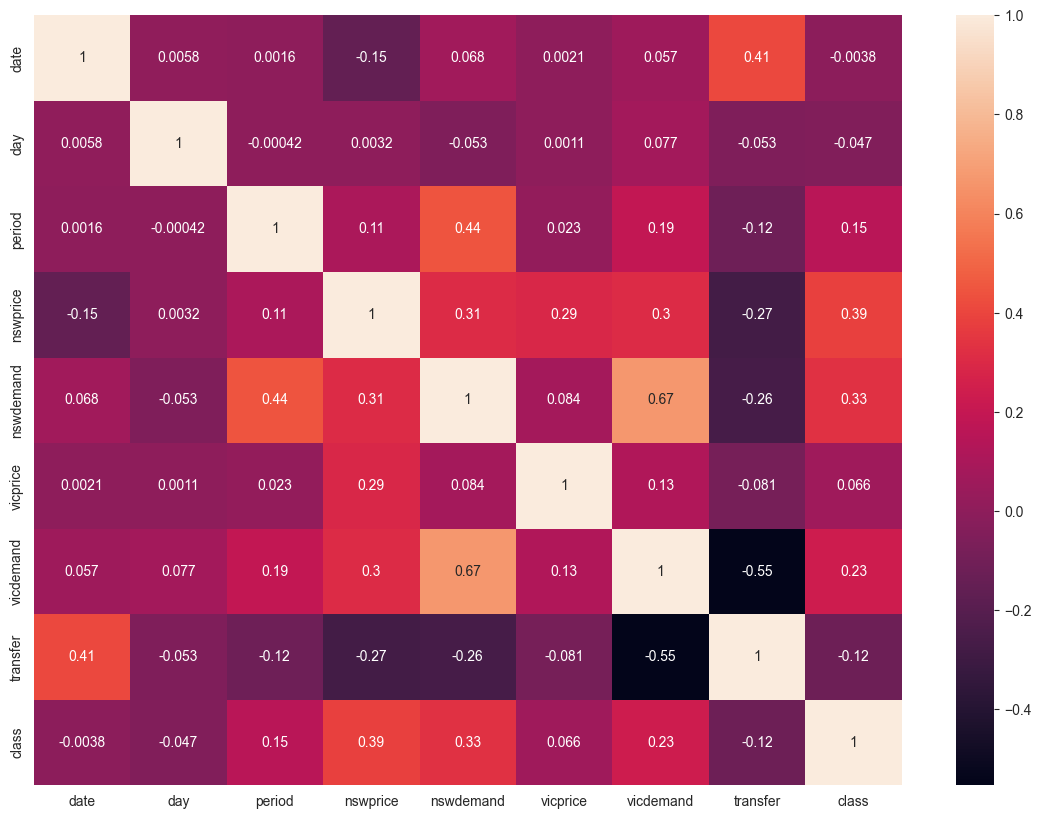

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True)

Постройте гистограммы распределений для всех предикторов. Рекомендуем использовать `plt.hist()`. 
*Определите признак по следующему изображению `hist`, количество корзин равно `10`.*

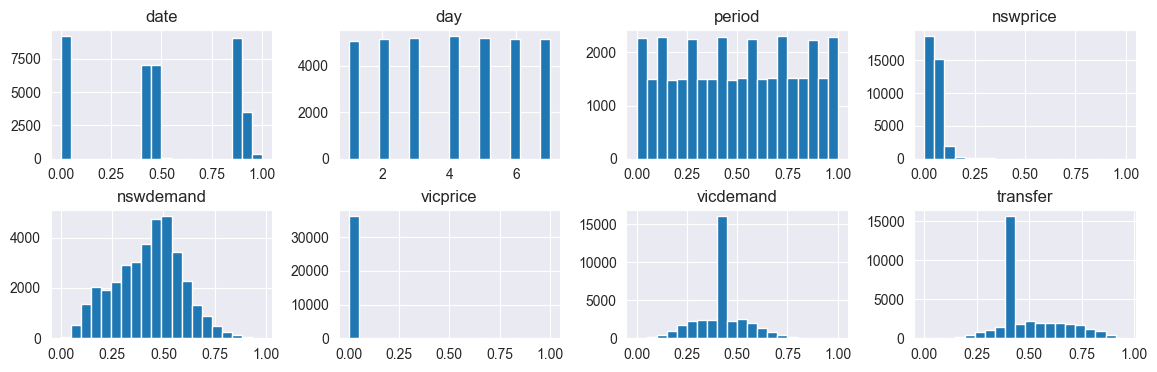

In [3]:
fig, ax = plt.subplots(2, 4, figsize=(14, 4))
ax = ax.flatten()
for i, label in enumerate(data.drop("class", axis=1).columns):
    ax[i].hist(data[label], bins=20)
    ax[i].set_title(label)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

При помощи `train_test_split` разбейте полученный набор данных на тренировочную и тестовую выборки со следующими параметрами: `test_size=0.2, random_state=11`

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("class", axis=1), data["class"], test_size=0.2, random_state=11)

**2. Random Forests Classifier**

Обучите модель `sklearn.ensemble.RandomForestClassifier` на тренировочных данных со следующими параметрами: `random_state=11`. Постройте `classification_report` полученной модели на тренировочных данных.

Замечание: количество отображамых знаков после запятой в `classification_report` регулируется параметром `digits`. По умолчанию отображается лишь `2` знака после запятой.

*Введите значение точности модели на тренировочных данных.*

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     16668
           1      1.000     1.000     1.000     12331

    accuracy                          1.000     28999
   macro avg      1.000     1.000     1.000     28999
weighted avg      1.000     1.000     1.000     28999



Добавление к лесу деревьев `GridSearchCV`.

При помощи `sklearn.model_selection.GridSearchCV` обучите `RandomForestClassifier` на тренировочных данных со следующими параметрами:

Выберите лучшую модель. Рекомендуем использовать поле `best_estimator_` объекта класса `grid_search`. В поле `best_params_` этого же объекта можно найти параметры лучшей модели.

In [6]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators': [100,300,500], 
               'max_leaf_nodes': list(range(6,10)), 
               'min_samples_leaf': [1,2,3]}
grid = GridSearchCV(RandomForestClassifier(bootstrap=False, class_weight='balanced', n_jobs=-1, max_features='sqrt', random_state=11), params_grid, verbose=4, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.774 total time=   0.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.766 total time=   0.4s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.770 total time=   0.4s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.773 total time=   1.0s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.770 total time=   1.1s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.773 total time=   1.1s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.773 total time=   1.6s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.771 total time=   1.6s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.774 total time=   1.6s
[CV 1/3] END max_leaf_nodes=6

/Users/max/Desktop/University/Магистратура/1 semester/ML/ML_BASE/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=11),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

*Введите значение параметра `max_leaf_nodes` лучшей модели.*

In [7]:
grid.best_params_["max_leaf_nodes"]

9

*Введите значение параметра `min_samples_leaf` лучшей модели.*

In [8]:
grid.best_params_["min_samples_leaf"]

1

*Введите значение параметра `n_estimators` лучшей модели.*

In [9]:
grid.best_params_["n_estimators"]

100

Постройте classification_report полученной модели на тренировочных данных.

*Введите значение точности модели на тренировочных данных.*

In [10]:
y_pred = grid.predict(X_train)
print(classification_report(y_train, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.778     0.878     0.825     16668
           1      0.800     0.662     0.724     12331

    accuracy                          0.786     28999
   macro avg      0.789     0.770     0.775     28999
weighted avg      0.787     0.786     0.782     28999



In [11]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.784     0.873     0.826      4192
           1      0.794     0.671     0.727      3058

    accuracy                          0.788      7250
   macro avg      0.789     0.772     0.777      7250
weighted avg      0.788     0.788     0.784      7250



Значения важности признаков можно найти в поле `feature_importances_` модели.

*Определите название самого важного признака модели.*

In [12]:
print(data.columns[model.feature_importances_.argmax()])

nswprice


**3. Voting Classifier**

Используйте объект `sklearn.ensemble.VotingClassifier` с параметром `voting='hard'`. В качестве базовых алгоритмов используйте следующие классификаторы с соответствующими параметрами:`LogisticRegression(solver='liblinear', random_state=11), SVC(random_state=11), SGDClassifier(random_state=11)`. Обучите модель на тренировочных данных.

Постройте `classification_report` полученной модели на тестовых данных.

Введите значение точности модели на тестовых данных.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(solver='liblinear', random_state=11)
clf2 = SVC(random_state=11)
clf3 = SGDClassifier(random_state=11)

model = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('sgd', clf3)], voting='hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.751     0.875     0.808      4192
           1      0.778     0.602     0.679      3058

    accuracy                          0.760      7250
   macro avg      0.765     0.739     0.744      7250
weighted avg      0.762     0.760     0.754      7250



**4. Bagging Classifier**

На основе `sklearn.ensemble.BaggingClassifier`, используя `DecisionTreeClassifier`, обучите на тренировочных данных модель со следующими параметрами:
Постройте `classification_report` полученной модели на тестовых данных.

*Введите значение точности модели на тестовых данных.*

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(DecisionTreeClassifier(class_weight='balanced'), max_samples=0.5, max_features=0.5, bootstrap=False, random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.859     0.911     0.885      4192
           1      0.868     0.796     0.830      3058

    accuracy                          0.863      7250
   macro avg      0.864     0.854     0.857      7250
weighted avg      0.863     0.863     0.862      7250



**5. Gradient Boosting Classifier**

Обучите модель `sklearn.ensemble.GradientBoostingClassifier` на тренировочных данных со следующими параметрами: `n_estimators=500, learning_rate=0.8, random_state=11, max_depth=2`.

Постройте `classification_report` полученной модели на тестовых данных.

*Введите значение точности модели на тестовых данных.*

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=11, max_depth=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.884     0.895     0.889      4192
           1      0.853     0.839     0.846      3058

    accuracy                          0.871      7250
   macro avg      0.869     0.867     0.868      7250
weighted avg      0.871     0.871     0.871      7250



**6. AdaBoost Classifier**

На основе `sklearn.ensemble.AdaBoostClassifier`, используя `DecisionTreeClassifier`, обучите на тренировочных данных модель со следующими параметрами:
Постройте `classification_report` полученной модели на тестовых данных.

*Введите значение точности модели на тестовых данных.*

In [16]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'), n_estimators=300, learning_rate=0.5, random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

/Users/max/Desktop/University/Магистратура/1 semester/ML/ML_BASE/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0      0.928     0.903     0.915      4192
           1      0.872     0.904     0.888      3058

    accuracy                          0.903      7250
   macro avg      0.900     0.903     0.901      7250
weighted avg      0.904     0.903     0.904      7250



**7. Stacking Classifier**

Обучите модель на основе `sklearn.ensemble.StackingClassifier`. Базовые алгоритмы: `RandomForestClassifier(random_state=11), SVC(random_state=11)`. Решающий: `LogisticRegression(random_state=11)`.

Постройте `classification_report` полученной модели на тестовых данных.

*Введите значение точности модели на тестовых данных.*

In [17]:
from sklearn.ensemble import StackingClassifier
rf = RandomForestClassifier(random_state=11)
svc = SVC(random_state=11)
lt = LogisticRegression(random_state=11)
model = StackingClassifier(estimators=[("rf", rf), ("svc", svc)], final_estimator=lt)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.913     0.921     0.917      4192
           1      0.891     0.880     0.885      3058

    accuracy                          0.904      7250
   macro avg      0.902     0.901     0.901      7250
weighted avg      0.904     0.904     0.904      7250



# Задача 2
Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное `0.925`. В качестве метрики используется `accuracy_score()`.

ВАЖНО: Пауза между попытками составляет 5 минут.

Предсказания вводить в виде списка, например: `[0,1,0,0]`.

In [18]:
# 0.909
# def train_model(X, y):
#     rf = RandomForestClassifier(random_state=11)
#     dt = DecisionTreeClassifier(random_state=11)
#     svc = SVC(random_state=11)
#     lt = LogisticRegression(random_state=11)
#     model = StackingClassifier(estimators=[("rf", rf),("dt", dt), ("svc", svc)], final_estimator=lt)
#     model.fit(X, y)
#     return model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# 0.910404943176
def train_model(X, y):
    clf1 = KNeighborsClassifier()
    clf2 = RandomForestClassifier(random_state=11)
    clf3 = GaussianNB()
    lt = LogisticRegression(random_state=11)
    model = StackingClassifier(estimators=[("clf1", clf1),("clf2", clf2), ("clf3", clf3) ], final_estimator=lt)
    model.fit(X, y)
    return model

In [19]:
from sklearn.metrics import accuracy_score
data = pd.read_csv('data/electricity_train.csv')

In [20]:
# best = 0.9038620689655172
X_train, X_test, y_train, y_test = train_test_split(data.drop("class", axis=1), data["class"], test_size=0.2, random_state=11)
model = train_model(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9060689655172414


In [21]:
X_train = data.drop("class", axis=1)
y_train = data["class"]
X_test = pd.read_csv('data/electricity_reserved.csv')

In [22]:
model = train_model(X_train, y_train)
y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))

1.0


In [23]:
# best = 0.910404943176
y_pred = model.predict(X_test)
with open('ans.txt', 'w') as f:
    f.write(str(y_pred.tolist()))
    f.write('\n')